In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
plt.figure(figsize=(10,10))

def get_img(path):
  test_img = Image.open(path)
  plt.subplot(5,5,i)
  plt.imshow(test_img, cmap = "gray")
  test_img = test_img.convert('1')
  test_x = np.array(test_img, np.float32)
  test_x = test_x.reshape([-1, 36])
  return test_x
  

<Figure size 720x720 with 0 Axes>

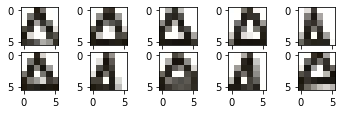

In [4]:
x_train = []
y_train = []
  
path = '/content/drive/My Drive/colab/lab2/Triangle/1_'
for i in range(1,11,1):
  x_train.append(get_img(path + str(i) +'.jpg')[0])
  y_train.append(1)

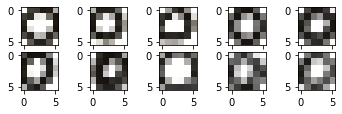

In [5]:
path = '/content/drive/My Drive/colab/lab2/Circle/2_'
for i in range(1,11,1):
  x_train.append(get_img(path + str(i) +'.jpg')[0])
  y_train.append(-1)

In [6]:
print(x_train[0])

[1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.]


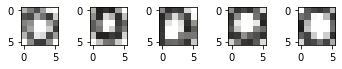

In [7]:
x_test_big = []
x_test = []
y_test = []
path = '/content/drive/My Drive/colab/lab2/TestCircle/4_'
for i in range(1,6,1):
  x_test.append(get_img(path + str(i) +'.jpg')[0])
  y_test.append(-1)

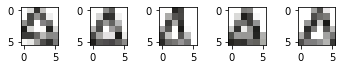

In [8]:

path = '/content/drive/My Drive/colab/lab2/TestTriangle/3_'
for i in range(1,6,1):
  x_test.append(get_img(path + str(i) +'.jpg')[0])
  y_test.append(1)

In [9]:
def add_bias_feature(a):
    a_extended = np.zeros((a.shape[0],a.shape[1]+1))
    a_extended[:,:-1] = a
    a_extended[:,-1] = int(1)  
    return a_extended

def linear_func(w, x):
  return np.dot(w, x)

def polinom_func(w, x):
  return np.dot(w, x) ** 2

def polinomh_func(w, x):
  return (np.dot(w, x) + 1) ** 2

class MySVM():
    def __init__(self, etha=0.01, alpha=0.1, epochs=100, kernel = "linear"):
        self._epochs = epochs
        self._etha = etha
        self._alpha = alpha
        self._w = None
        self.history_w = []
        self.train_errors = None
        self.train_loss = None
        self.kernel = kernel
        self.kernel_funcs = {
            'linear': linear_func,
            'polinom': polinom_func,
            'polinomh' : polinomh_func
        }

    def fit(self, X_train, Y_train):
        X_train = add_bias_feature(X_train)
        self._w = np.random.normal(loc=0, scale=0.05, size=X_train.shape[1])
        self.history_w.append(self._w)
        train_errors = []
        train_loss_epoch = []

        for epoch in range(self._epochs): 
            tr_err = 0
            tr_loss = 0
            for i,x in enumerate(X_train):
                margin = Y_train[i]*np.dot(self._w,X_train[i])
                if margin >= 1:
                    self._w = self._w - self._etha*self._alpha*self._w/self._epochs
                    tr_loss += self.soft_margin_loss(X_train[i],Y_train[i])
                else:
                    self._w = self._w +\
                    self._etha*(Y_train[i]*X_train[i] - self._alpha*self._w/self._epochs)
                    tr_err += 1
                    tr_loss += self.soft_margin_loss(X_train[i],Y_train[i])
                self.history_w.append(self._w)
            train_errors.append(tr_err)
            train_loss_epoch.append(tr_loss)
        self.history_w = np.array(self.history_w)    
        self.train_errors = np.array(train_errors)
        self.train_loss = np.array(train_loss_epoch) 

    def predict(self, X:np.array) -> np.array:
        y_pred = []
        X_extended = add_bias_feature(X)
        for i in range(len(X_extended)):
            y_pred.append(np.sign(self.kernel_funcs[self.kernel](self._w,X_extended[i])))
        return np.array(y_pred)         

    def hinge_loss(self, x, y):
        return max(0,1 - y*self.kernel_funcs[self.kernel](x, self._w))

    def soft_margin_loss(self, x, y):
        return self.hinge_loss(x, y) + self._alpha*np.dot(self._w, self._w)

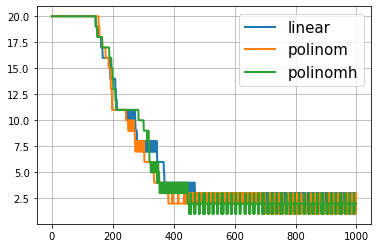

In [10]:
# блок инициализиции и обучения
kernels = ['linear','polinom','polinomh']
for k in kernels:
  svm = MySVM(etha=0.0001, alpha=0.0001, epochs=1000, kernel = k)
  svm.fit(np.array(x_train), np.array(y_train))
  plt.plot(svm.train_errors, linewidth=2, label = k)
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

In [11]:
svm = MySVM(etha=0.0001, alpha=0.0001, epochs=1000, kernel = 'linear')
svm.fit(np.array(x_train), np.array(y_train))
y_pred = svm.predict(np.array(x_test))
print(y_pred)

[-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]


In [12]:
def minus_to_zero(x):
  if x == -1:
    return 0
  return 1

acc:1.0


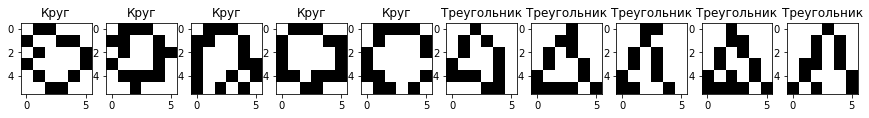

In [13]:
acc = accuracy_score(y_test, y_pred)
print("acc:" + str(acc))
ress = ['Круг', 'Треугольник']
plt.figure(figsize=(15,5))
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.title(ress[minus_to_zero(y_pred[i])])
  img = np.reshape((x_test[i]), [6, 6])
  plt.imshow(img, cmap="gray")